----
 ####        ___Лабораторная работа №1___ 
#### ___📄 Градиентный спуск и его модификации___  # 

----

> ___Лабораторная работа №1___           по курсу Фундаментальные концепции ИИ (ML)       
>🎓  Прозоров Евгений Иванович 109М    
>📧 eugene_ivanson@mail.ru       
>tg: @Eug_Iva           

___Описание задачи:___ 
Источник:  https://github.com/resi2311/AI-fundamentals#лабораторные-работы     
Градиентный спуск и его модификации           
Выбрать тестовые функции оптимизации (2 шт)         
Запрограммировать собственную реализацию классического градиентного спуска         
Запрограммировать пайлайн тестирования алгоритма оптимизации         
Визуализации функции и точки оптимума         
Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков         
Визуализации точки найденного решения (можно добавить анимацию на плюс балл)         
Запрограммировать метод вычисления градиента         
Передача функции градиента от пользователя         
Символьное вычисление градиента (например с помощью sympy) (на доп балл)         
Численная аппроксимация градиента (на доп балл)         
Запрограммировать одну моментную модификацию и протестировать ее         
Запрограммировать одну адаптивную модификацию и протестировать ее         
Запрограммировать метод эфолюции темпа обучения и/или метод выбора начального приближения и протестировать их         



[  8.85865833  -2.41978084  12.12105557  16.62889159  -0.76484375
   3.53780706  -2.98221829  -9.2427185  -20.99127049 -11.68270229
   7.19205392  -9.47655581 -22.86136357  16.33707892  -5.63227352
  -6.08170423  -5.85621096  16.53720928 -20.52152136 -18.41421604
 -13.06348707 -22.78550209 -19.84488988 -11.2842228    2.45432997
   1.324209    10.88338635  -3.44723605   1.86252312 -20.65106585
  -6.67131722  -6.78686311 -19.74473194  10.8167754  -10.396718
  -3.10797518 -11.06707009 -15.98106207  -1.04940081  -1.08200308
   4.75952946   0.81847801   0.39539752  15.96814349   6.76423259
 -17.90172037  -1.15357192   3.31803975 -19.448937   -13.74572367
 -17.52185085 -13.92431762  14.1841223    3.76991321   4.29820892
 -15.14724042 -20.62277955  -2.47912975  12.21928056   4.01305853
  14.29628365  -4.30917379  13.54306912 -20.55872417   6.66576376
  15.49695121 -22.41213934  15.99156423  -2.76478804  14.69239108
 -10.67070483   4.88502925  12.54531093   9.16929895   0.9141694
  -6.19377067

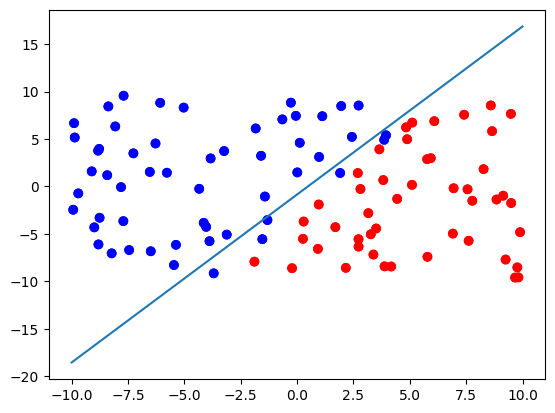

In [1]:
import sklearn
import numpy as np
import random

import matplotlib.pyplot as plt

def f(x):
  return 2*x - 3

points = np.random.uniform(-10.0,10.0, size=(100,2))



y_true = f(points[:,0])
print(y_true)

labels_ = y_true > points[:,1]
labels = np.zeros(labels_.shape, dtype=np.float32)
for i in range(len(labels_)):
  labels[i] = 1.0 if labels_[i] else 0.0

labels

colors = []
for label in labels_:
  colors += ['red'] if label else ['blue']

plt.scatter(points[:,0], points[:,1], c=colors)
plt.plot()

X_train = points.copy()

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, labels)

X_test = np.random.uniform(-10.0,10.0, size=(10,2))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

y_pred

Y_test_real_ = f(X_test[:,0]) > X_test[:,1]
Y_test_real = np.zeros(Y_test_real_.shape, dtype=np.float32)
for i in range(len(Y_test_real_)):
  Y_test_real[i] = 1.0 if Y_test_real_[i] else 0.0

Y_test_real

clf.coef_

k = clf.coef_[0,0]
b = clf.coef_[0,1]

def g(x):
  return k*x + b

p1 = (-10, 10)
p2 = (g(-10), g(10))

plt.scatter(points[:,0], points[:,1], c=colors)
plt.plot(p1, p2)



In [5]:
from sklearn import svm
model = svm.SVC(kernel='linear')
X = np.concatenate((points, points))
y = np.concatenate((points, points))
model.fit(X, y)

<class 'ValueError'>: y should be a 1d array, got an array of shape (200, 2) instead.